In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
centralized_trees = pd.read_csv('../data/centralized_data/n_estimators.csv', nrows=28)
centralized_pearson_corr = pd.read_csv('../data/centralized_data/n_estimators_pearson_corr_unchange.csv', nrows=28)

best_forests_data = pd.read_csv('../data/simulation/best_forests_strategy_sim.csv')
best_trees_data = pd.read_csv('../data/simulation/best_trees_strategy_sim.csv')
random_strat_data = pd.read_csv('../data/simulation/random_strategy_sim.csv')
#threshold_data = pd.read_csv('../data/simulation/threshold_strategy_sim_trees.csv', nrows=79)
threshold_data = pd.read_csv('../data/simulation/threshold_strategy_sim.csv')

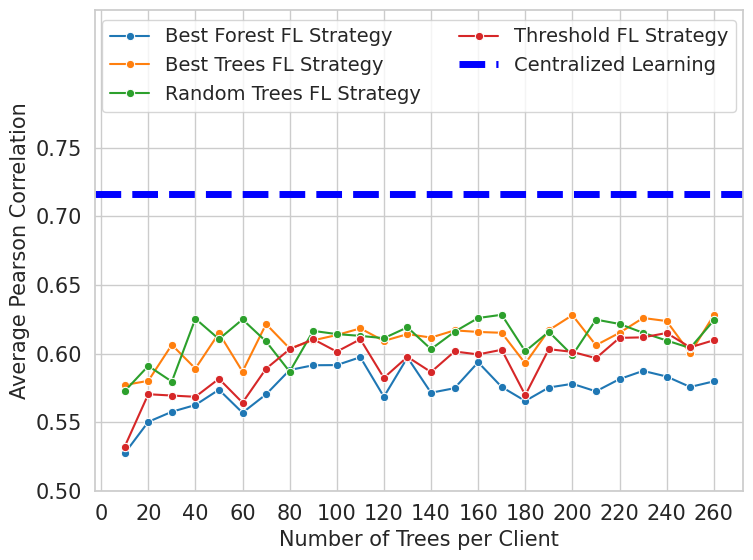

In [3]:
# Configurações estéticas do seaborn
sns.set(style="whitegrid")

# Calcular a média das colunas pearson (1 a 4)
best_forests_data['pearson_mean'] = best_forests_data[['pearson_corr1', 'pearson_corr2', 'pearson_corr3', 'pearson_corr4']].mean(axis=1)
best_trees_data['pearson_mean'] = best_trees_data[['pearson_corr1', 'pearson_corr2', 'pearson_corr3', 'pearson_corr4']].mean(axis=1)
threshold_data['pearson_mean'] = threshold_data[['pearson_corr1', 'pearson_corr2', 'pearson_corr3', 'pearson_corr4']].mean(axis=1)
random_strat_data['pearson_mean'] = random_strat_data[['pearson_corr1', 'pearson_corr2', 'pearson_corr3', 'pearson_corr4']].mean(axis=1)

centralized_mean = centralized_pearson_corr['pearson_corr'].mean()

# Configurações estéticas
plt.rcParams['font.size'] = 20
plt.figure(figsize=(8, 6))

# Linhas do gráfico
sns.lineplot(x=best_forests_data['trees_by_client'], y=best_forests_data['pearson_mean'], label='Best Forest FL Strategy', marker='o', color='#1f77b4', errorbar=None)
sns.lineplot(x=best_trees_data['trees_by_client'], y=best_trees_data['pearson_mean'], label='Best Trees FL Strategy', marker='o', color='#ff7f0e', errorbar=None)
sns.lineplot(x=random_strat_data['trees_by_client'], y=random_strat_data['pearson_mean'], label='Random Trees FL Strategy', marker='o', color='#2ca02c', errorbar=None)
sns.lineplot(x=threshold_data['trees_by_client'], y=threshold_data['pearson_mean'], label='Threshold FL Strategy', marker='o', color='#d62728', errorbar=None)
plt.axhline(y=centralized_mean, color='blue', linestyle='--', label='Centralized Learning', linewidth=5)

# Configurações adicionais
# plt.title('Average Pearson Correlation by Number of Trees for Each Client')
plt.xlabel('Number of Trees per Client', fontsize=15)
plt.ylabel('Average Pearson Correlation', fontsize=15)
plt.ylim(0.5, 0.85)
plt.grid(True)
plt.legend(fontsize=14, ncols=2, loc='upper center')

# # Personalizar ticks no eixo X
plt.xticks(range(0, int(best_forests_data['trees_by_client'].max()) + 1, 20), fontsize=15)

# # Personalizar ticks no eixo Y
plt.yticks([i / 100 for i in range(50, 76, 5)], fontsize=15)


# Exibir o gráfico
plt.tight_layout()
plt.savefig('pearson_by_trees.pdf', format='pdf')
plt.show()


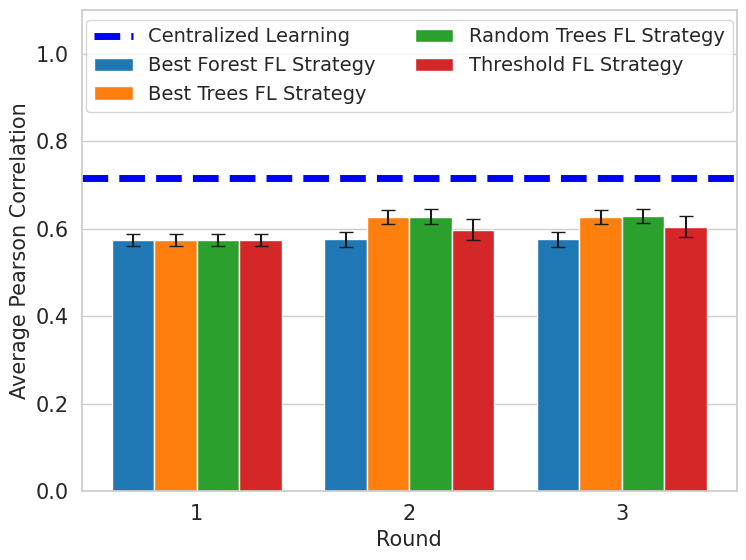

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular a média das colunas pearson (1 a 4) e o desvio padrão para cada estratégia
best_forests_stats = best_forests_data.groupby('round')['pearson_mean'].agg(['mean', 'std'])
best_trees_stats = best_trees_data.groupby('round')['pearson_mean'].agg(['mean', 'std'])
random_strat_stats = random_strat_data.groupby('round')['pearson_mean'].agg(['mean', 'std'])
threshold_stats = threshold_data.groupby('round')['pearson_mean'].agg(['mean', 'std'])

# Criar o gráfico de barras dividido por round
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
bar_positions = np.arange(len(best_forests_stats))

# Centralizado
plt.axhline(y=centralized_mean, color='blue', linestyle='--', label='Centralized Learning', linewidth=5)

# Estratégia Melhores Florestas
plt.bar(bar_positions, best_forests_stats['mean'], width=bar_width, yerr=best_forests_stats['std'], label='Best Forest FL Strategy', capsize=5, color='#1f77b4')

# Estratégia Melhores Árvores
plt.bar(bar_positions + bar_width, best_trees_stats['mean'], width=bar_width, yerr=best_trees_stats['std'], label='Best Trees FL Strategy', capsize=5, color='#ff7f0e')

# Estratégia Árvores Aleatórias
plt.bar(bar_positions + 2 * bar_width, random_strat_stats['mean'], width=bar_width, yerr=random_strat_stats['std'], label='Random Trees FL Strategy', capsize=5, color='#2ca02c')

# Estratégia Threshold
plt.bar(bar_positions + 3 * bar_width, threshold_stats['mean'], width=bar_width, yerr=threshold_stats['std'], label='Threshold FL Strategy', capsize=5, color='#d62728')

# Configurações do gráfico
plt.xlabel('Round', fontsize=15)
plt.ylabel('Average Pearson Correlation', fontsize=15)
plt.xticks(bar_positions + 1.5 * bar_width, best_forests_stats.index, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 1.1)
plt.grid(axis='x')
plt.legend(fontsize=14, ncols=2, loc='upper center')
plt.tight_layout()
plt.savefig('pearson_by_round.pdf', format='pdf')
plt.show()

In [5]:
print(len(best_forests_stats))

3


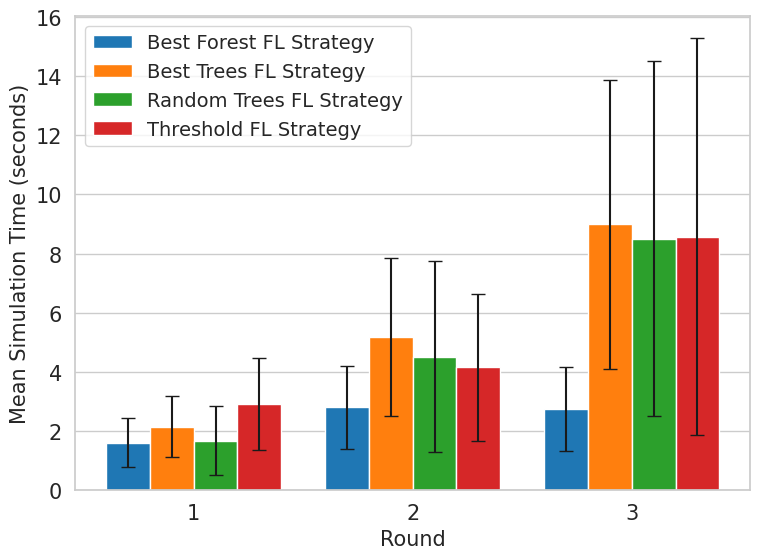

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular a média das colunas sim_time e o desvio padrão para cada estratégia
best_forests_stats = best_forests_data.groupby('round')['sim_time'].agg(['mean', 'std'])
best_trees_stats = best_trees_data.groupby('round')['sim_time'].agg(['mean', 'std'])
random_strat_stats = random_strat_data.groupby('round')['sim_time'].agg(['mean', 'std'])
threshold_stats = threshold_data.groupby('round')['sim_time'].agg(['mean', 'std'])

# Criar o gráfico de barras dividido por round
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
bar_positions = np.arange(len(best_forests_stats))

# Estratégia Melhores Florestas
plt.bar(bar_positions, best_forests_stats['mean'], width=bar_width, yerr=best_forests_stats['std'], label='Best Forest FL Strategy', capsize=5, color='#1f77b4')

# Estratégia Melhores Árvores
plt.bar(bar_positions + bar_width, best_trees_stats['mean'], width=bar_width, yerr=best_trees_stats['std'], label='Best Trees FL Strategy', capsize=5, color='#ff7f0e')

# Estratégia Árvores Aleatórias
plt.bar(bar_positions + 2 * bar_width, random_strat_stats['mean'], width=bar_width, yerr=random_strat_stats['std'], label='Random Trees FL Strategy', capsize=5, color='#2ca02c')

# Estratégia Threshold
plt.bar(bar_positions + 3 * bar_width, threshold_stats['mean'], width=bar_width, yerr=threshold_stats['std'], label='Threshold FL Strategy', capsize=5, color='#d62728')

# Configurações do gráfico
plt.xlabel('Round', fontsize=15)
plt.ylabel('Mean Simulation Time (seconds)', fontsize=15)
plt.xticks(bar_positions + 1.5 * bar_width, best_forests_stats.index, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='x')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('sim_time_by_round_with_error.pdf', format='pdf')
plt.show()


## 10 a 100 árvores

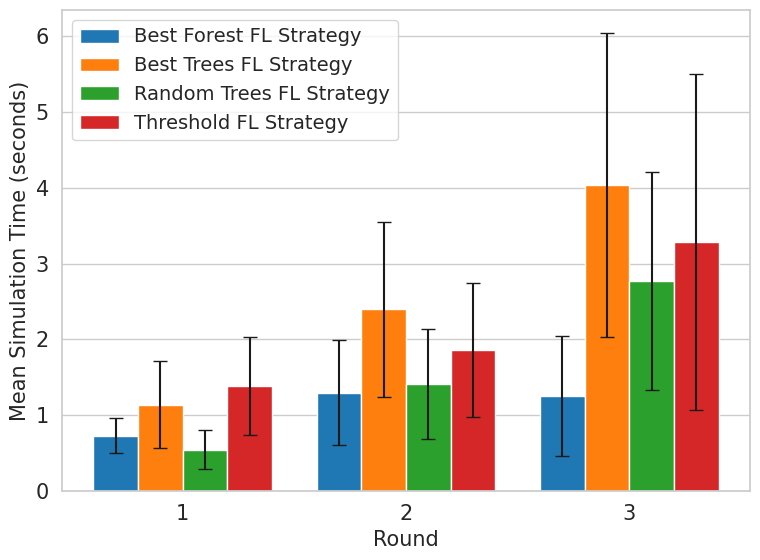

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular a média das colunas sim_time e o desvio padrão para cada estratégia
best_forests_stats = best_forests_data.head(30).groupby('round')['sim_time'].agg(['mean', 'std'])
best_trees_stats = best_trees_data.head(30).groupby('round')['sim_time'].agg(['mean', 'std'])
random_strat_stats = random_strat_data.head(30).groupby('round')['sim_time'].agg(['mean', 'std'])
threshold_stats = threshold_data.head(30).groupby('round')['sim_time'].agg(['mean', 'std'])

# Criar o gráfico de barras dividido por round
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
bar_positions = np.arange(len(best_forests_stats))

# Estratégia Melhores Florestas
plt.bar(bar_positions, best_forests_stats['mean'], width=bar_width, yerr=best_forests_stats['std'], label='Best Forest FL Strategy', capsize=5, color='#1f77b4')

# Estratégia Melhores Árvores
plt.bar(bar_positions + bar_width, best_trees_stats['mean'], width=bar_width, yerr=best_trees_stats['std'], label='Best Trees FL Strategy', capsize=5, color='#ff7f0e')

# Estratégia Árvores Aleatórias
plt.bar(bar_positions + 2 * bar_width, random_strat_stats['mean'], width=bar_width, yerr=random_strat_stats['std'], label='Random Trees FL Strategy', capsize=5, color='#2ca02c')

# Estratégia Threshold
plt.bar(bar_positions + 3 * bar_width, threshold_stats['mean'], width=bar_width, yerr=threshold_stats['std'], label='Threshold FL Strategy', capsize=5, color='#d62728')

# Configurações do gráfico
plt.xlabel('Round', fontsize=15)
plt.ylabel('Mean Simulation Time (seconds)', fontsize=15)
plt.xticks(bar_positions + 1.5 * bar_width, best_forests_stats.index, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='x')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('sim_time_by_round_with_error_30.pdf', format='pdf')
plt.show()


## 110 a 200 árvores

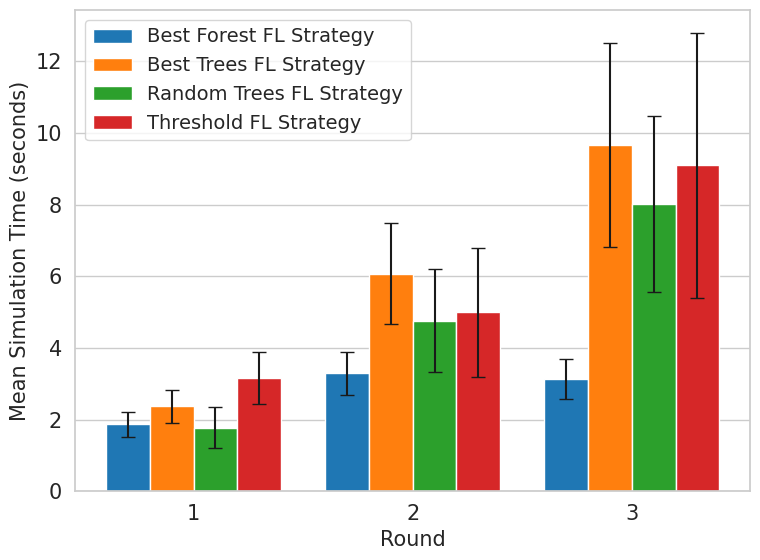

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular a média das colunas sim_time e o desvio padrão para cada estratégia
best_forests_stats = best_forests_data.iloc[29:59].groupby('round')['sim_time'].agg(['mean', 'std'])
best_trees_stats = best_trees_data.iloc[29:59].groupby('round')['sim_time'].agg(['mean', 'std'])
random_strat_stats = random_strat_data.iloc[29:59].groupby('round')['sim_time'].agg(['mean', 'std'])
threshold_stats = threshold_data.iloc[29:59].groupby('round')['sim_time'].agg(['mean', 'std'])

# Criar o gráfico de barras dividido por round
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
bar_positions = np.arange(len(best_forests_stats))

# Estratégia Melhores Florestas
plt.bar(bar_positions, best_forests_stats['mean'], width=bar_width, yerr=best_forests_stats['std'], label='Best Forest FL Strategy', capsize=5, color='#1f77b4')

# Estratégia Melhores Árvores
plt.bar(bar_positions + bar_width, best_trees_stats['mean'], width=bar_width, yerr=best_trees_stats['std'], label='Best Trees FL Strategy', capsize=5, color='#ff7f0e')

# Estratégia Árvores Aleatórias
plt.bar(bar_positions + 2 * bar_width, random_strat_stats['mean'], width=bar_width, yerr=random_strat_stats['std'], label='Random Trees FL Strategy', capsize=5, color='#2ca02c')

# Estratégia Threshold
plt.bar(bar_positions + 3 * bar_width, threshold_stats['mean'], width=bar_width, yerr=threshold_stats['std'], label='Threshold FL Strategy', capsize=5, color='#d62728')

# Configurações do gráfico
plt.xlabel('Round', fontsize=15)
plt.ylabel('Mean Simulation Time (seconds)', fontsize=15)
plt.xticks(bar_positions + 1.5 * bar_width, best_forests_stats.index, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='x')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('sim_time_by_round_with_error_60.pdf', format='pdf')
plt.show()


## 210 a 300 árvores

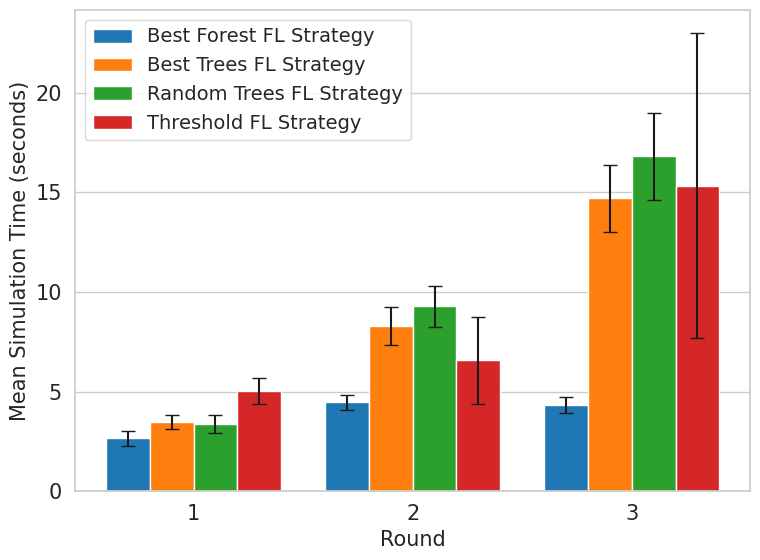

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular a média das colunas sim_time e o desvio padrão pa90 cada estratégia
best_forests_stats = best_forests_data.iloc[59:90].groupby('round')['sim_time'].agg(['mean', 'std'])
best_trees_stats = best_trees_data.iloc[59:90].groupby('round')['sim_time'].agg(['mean', 'std'])
random_strat_stats = random_strat_data.iloc[59:90].groupby('round')['sim_time'].agg(['mean', 'std'])
threshold_stats = threshold_data.iloc[59:90].groupby('round')['sim_time'].agg(['mean', 'std'])

# Criar o gráfico de barras dividido por round
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
bar_positions = np.arange(len(best_forests_stats))

# Estratégia Melhores Florestas
plt.bar(bar_positions, best_forests_stats['mean'], width=bar_width, yerr=best_forests_stats['std'], label='Best Forest FL Strategy', capsize=5, color='#1f77b4')

# Estratégia Melhores Árvores
plt.bar(bar_positions + bar_width, best_trees_stats['mean'], width=bar_width, yerr=best_trees_stats['std'], label='Best Trees FL Strategy', capsize=5, color='#ff7f0e')

# Estratégia Árvores Aleatórias
plt.bar(bar_positions + 2 * bar_width, random_strat_stats['mean'], width=bar_width, yerr=random_strat_stats['std'], label='Random Trees FL Strategy', capsize=5, color='#2ca02c')

# Estratégia Threshold
plt.bar(bar_positions + 3 * bar_width, threshold_stats['mean'], width=bar_width, yerr=threshold_stats['std'], label='Threshold FL Strategy', capsize=5, color='#d62728')

# Configurações do gráfico
plt.xlabel('Round', fontsize=15)
plt.ylabel('Mean Simulation Time (seconds)', fontsize=15)
plt.xticks(bar_positions + 1.5 * bar_width, best_forests_stats.index, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='x')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('sim_time_by_round_with_error_90.pdf', format='pdf')
plt.show()


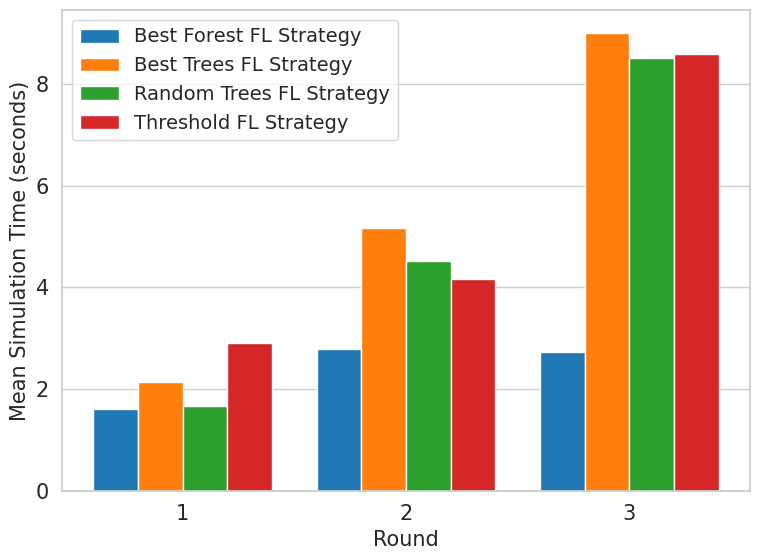

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular a média das colunas sim_time e o desvio padrão para cada estratégia
best_forests_stats = best_forests_data.groupby('round')['sim_time'].agg(['mean', 'std'])
best_trees_stats = best_trees_data.groupby('round')['sim_time'].agg(['mean', 'std'])
random_strat_stats = random_strat_data.groupby('round')['sim_time'].agg(['mean', 'std'])
threshold_stats = threshold_data.groupby('round')['sim_time'].agg(['mean', 'std'])

# Criar o gráfico de barras dividido por round
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
bar_positions = np.arange(len(best_forests_stats))

# Estratégia Melhores Florestas
plt.bar(bar_positions, best_forests_stats['mean'], width=bar_width, label='Best Forest FL Strategy', capsize=5, color='#1f77b4')

# Estratégia Melhores Árvores
plt.bar(bar_positions + bar_width, best_trees_stats['mean'], width=bar_width, label='Best Trees FL Strategy', capsize=5, color='#ff7f0e')

# Estratégia Árvores Aleatórias
plt.bar(bar_positions + 2 * bar_width, random_strat_stats['mean'], width=bar_width, label='Random Trees FL Strategy', capsize=5, color='#2ca02c')

# Estratégia Threshold
plt.bar(bar_positions + 3 * bar_width, threshold_stats['mean'], width=bar_width, label='Threshold FL Strategy', capsize=5, color='#d62728')

# Configurações do gráfico
plt.xlabel('Round', fontsize=15)
plt.ylabel('Mean Simulation Time (seconds)', fontsize=15)
plt.xticks(bar_positions + 1.5 * bar_width, best_forests_stats.index, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='x')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('sim_time_by_round_without_error.pdf', format='pdf')
plt.show()
